# Analysis SGX

In [48]:
import json
import csv
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import mplfinance as mpf

Load file


In [49]:
TIME, VOLUME, OPEN, HIGH, LOW, CLOSE, ADJ_CLOSE = 0, 1, 2, 3, 4, 5, 6

flatten_data = []
with open('../data-dump/C09.SI-max-1mo.csv', 'r', encoding='UTF8', newline='') as in_file:
    csv_reader = csv.reader(in_file)
    for row in csv_reader:
        flatten_data.append([
            datetime.strptime(row[TIME], "%Y-%m-%d %H:%M:%S"), 
            int(row[VOLUME]), 
            float(row[OPEN]), 
            float(row[HIGH]), 
            float(row[LOW]), 
            float(row[CLOSE])
        ])


In [50]:
# instrument = json_data['instrument']
# granularity = json_data['granularity']
# candles = json_data['candles']

# print(f"Instrument: [ {instrument} ], Granularity: [ {granularity} ]")


In [51]:
# flatten_data = [
#     [ 
#         datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
#         bool(x['complete']), 
#         int(x['volume']), 
#         float(x['mid']['o']), 
#         float(x['mid']['h']), 
#         float(x['mid']['l']), 
#         float(x['mid']['c'])
#     ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time', 'Volume', 'Open', 'High', 'Low', 'Close'])

# df.index = pd.DatetimeIndex(df['time'])

print(f"df shape: {df.shape}")

# print(df.info())

df shape: (272, 6)


In [52]:
df['ma'] = df['Close'].rolling(20).mean()
df['ewm'] = df['Close'].ewm(span=20, adjust=False).mean()
# df.head(30)
index_df = df.set_index('time')
index_df.tail(28)

,Volume,Open,High,Low,Close,ma,ewm
time,,,,,,,
2020-06-01 00:00:00,66296500,7.690000,9.300000,7.65,8.420000,9.160500,9.264019
2020-07-01 00:00:00,36791900,8.450000,9.020000,8.10,8.180000,9.148000,9.160779
2020-08-01 00:00:00,37370800,8.000000,8.460000,7.83,8.030000,9.143500,9.053086
2020-09-01 00:00:00,39979200,7.940000,8.180000,7.55,7.610000,9.064500,8.915649
2020-10-01 00:00:00,66391655,7.650000,7.890000,6.32,6.340000,8.935500,8.670349
2020-11-01 00:00:00,70010800,6.300000,8.070000,6.20,7.800000,8.873000,8.587459
2020-12-01 00:00:00,46600500,7.680000,8.100000,7.50,8.060000,8.829000,8.537225
2021-01-01 00:00:00,70554900,8.060000,8.060000,7.08,7.220000,8.779000,8.411775
2021-02-01 00:00:00,36473945,7.180000,7.590000,7.05,7.360000,8.673500,8.311606


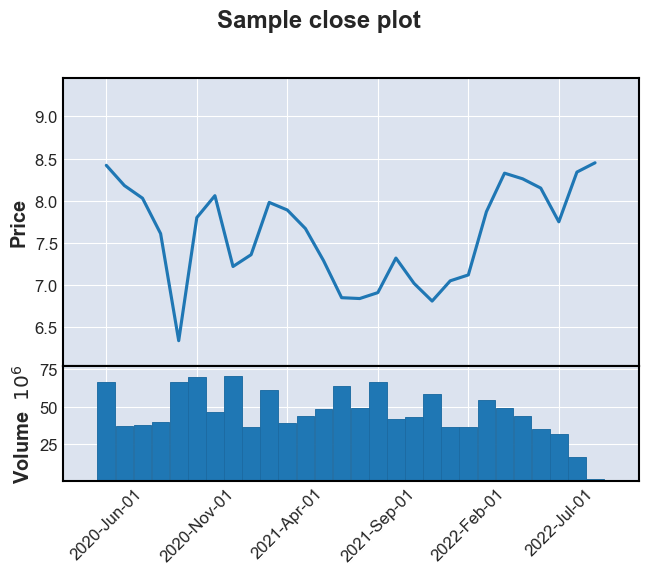

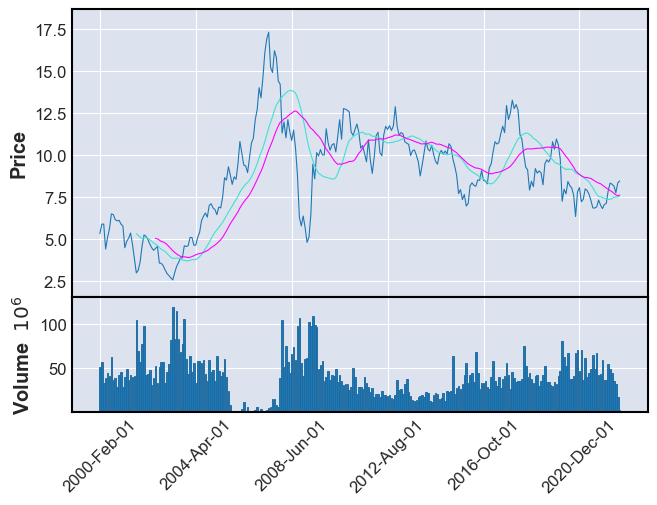

In [53]:
# This plots close
mpf.plot(index_df.tail(28),type='line', volume=True, title='Sample close plot')

# Need someway to auto figure out hlines
mpf.plot(index_df, type='line', 
    mav=(20, 30),
    #hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)
    

In [54]:
# https://github.com/matplotlib/mplfinance
dfx = df.tail(50).set_index('time')
dfx

,Volume,Open,High,Low,Close,ma,ewm
time,,,,,,,
2018-08-01 00:00:00,51774200,10.060000,10.090000,9.19,9.280000,11.301500,10.985353
2018-09-01 00:00:00,39362900,9.260000,9.270000,8.55,9.110000,11.295500,10.806748
2018-10-01 00:00:00,43756500,9.070000,9.160000,7.80,7.910000,11.217500,10.530867
2018-11-01 00:00:00,37364500,8.000000,8.850000,8.00,8.430000,11.129000,10.330785
2018-12-01 00:00:00,32534600,8.570000,8.940000,7.91,8.120000,10.995500,10.120234
2019-01-01 00:00:00,40335400,8.120000,9.250000,7.90,9.190000,10.922500,10.031640
2019-02-01 00:00:00,42048595,9.170000,9.550000,8.86,8.920000,10.832000,9.925770
2019-03-01 00:00:00,29286292,8.850000,9.140000,8.64,9.050000,10.721500,9.842363
2019-04-01 00:00:00,35329800,9.210000,9.480000,8.87,8.940000,10.583000,9.756424


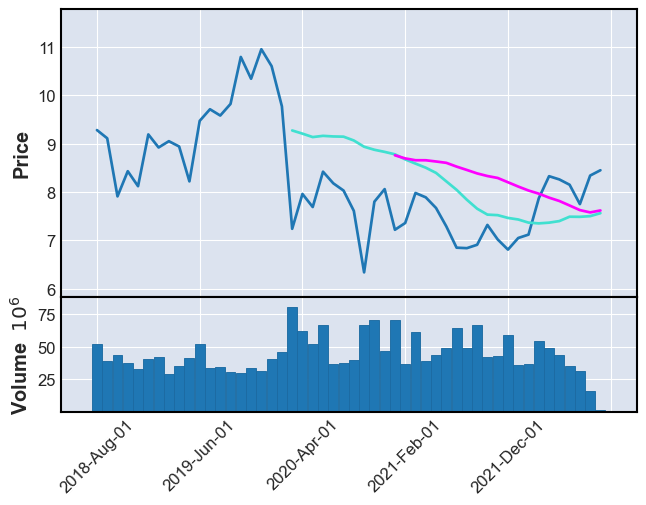

In [55]:
mpf.plot(dfx, type='line', 
    mav=(20, 30),
    # hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)
    

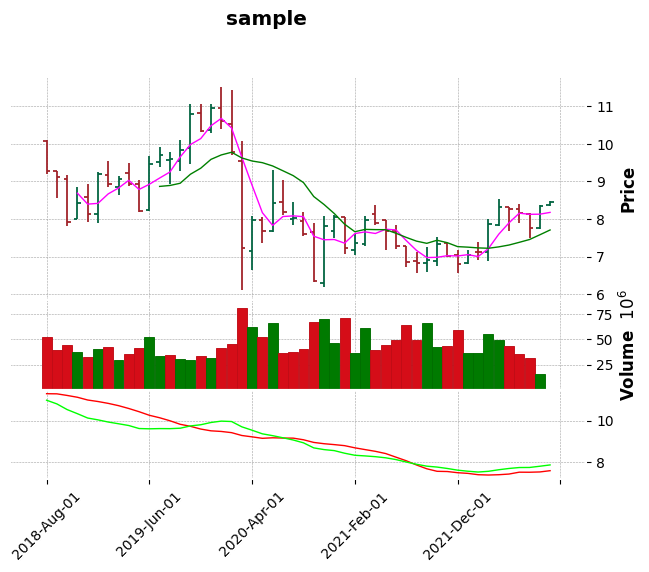

In [56]:
ap0 = [ 
    mpf.make_addplot(dfx['ma'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

#  mpf.available_styles()


mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

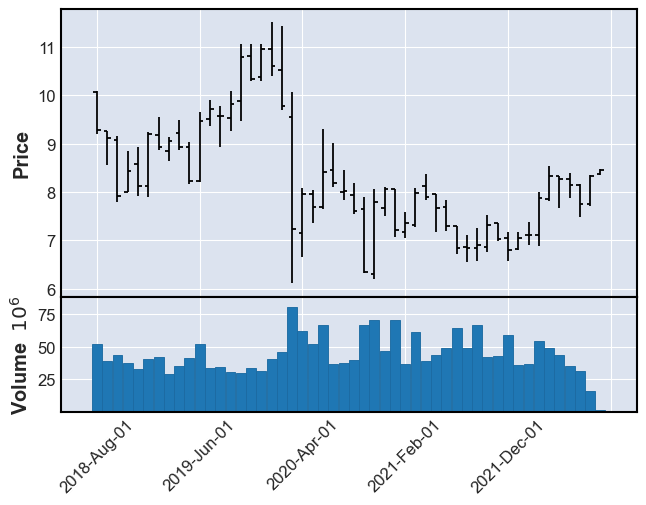

In [57]:
mpf.plot(dfx,volume=True)


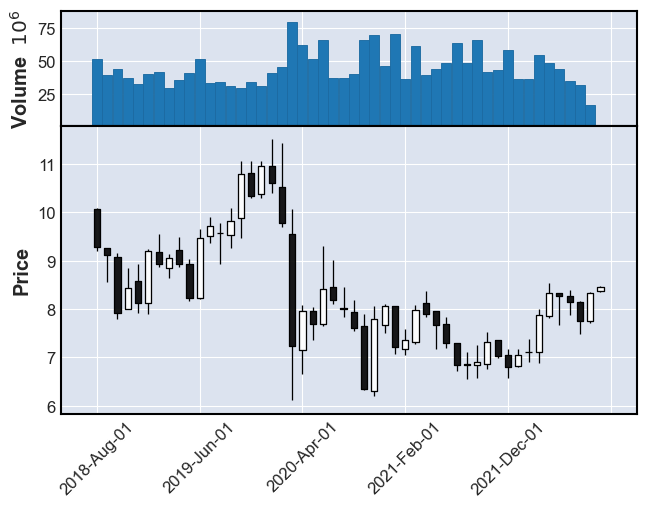

In [58]:
mpf.plot(dfx,type='candle',volume=True,main_panel=1,volume_panel=0)